C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Frequency Count of Home Ownership:
   Home_Ownership  Count
0       MORTGAGE   2327
1          OTHER     18
2            OWN    443
3           RENT   2839
Bar chart for Univariate Analysis


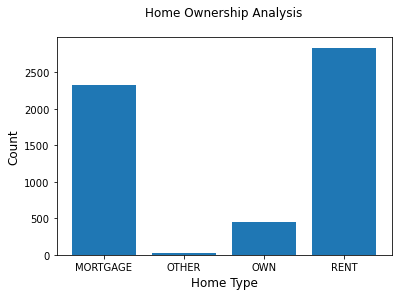


Box plot for Univariate Analysis:



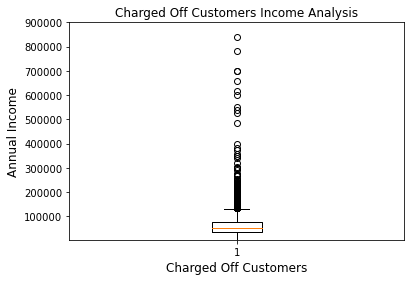

Mean of Annual Income: 62427.298034476626
25th percentile of Annual Income: 37000.0
Median of Annual Income: 53000.0
75th percentile of Annual Income: 75000.0
Standard Deviation of Annual Income: 47771.76875207226
IQR:  38000.0

 Box plot for Univariate Analysis post removal of outliers:

New Mean of Annual Income: 53243.55218852618
New Standard Deviation of Annual Income: 22511.51488815863


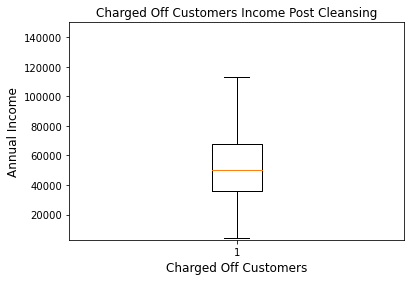


Univariate Analysis:Public Record of Bankruptcy Analysis:

   Public_Record_of_Bankruptcy  Count
0                          0.0   5141
1                          1.0    366
2                          2.0      2


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


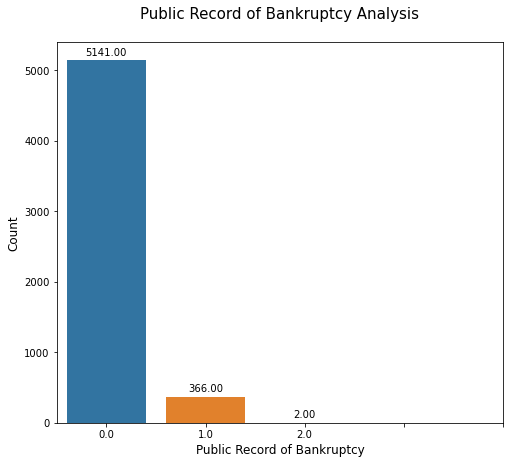


Correlation Coefficient: Funded Amount vs Interest Rate



C:\Users\Admin\AppData\Local\Temp/ipykernel_9144/1792446295.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['int_rate']=corr_data['int_rate'].str.replace('%','').astype(float)


Correlation Coefficient Matrix:
 [[1.         0.35390554]
 [0.35390554 1.        ]]

Bivariate Analysis: Purpose of Loan vs Deliquency



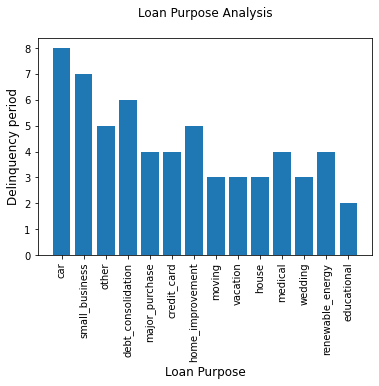


Bivariate Analysis :Fund Amount Delinquency Analysis:



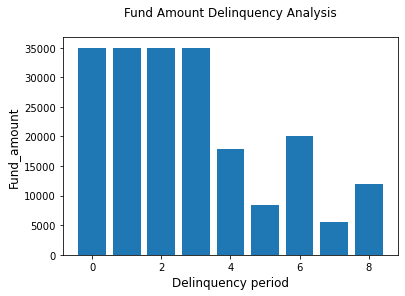


Bivariate Analysis :Fund amount vs Public Record Analysis:



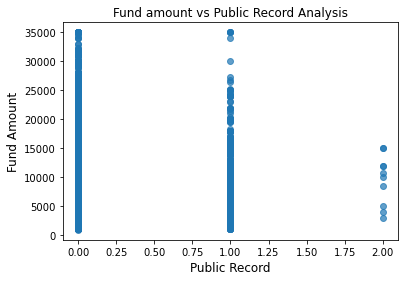


Bivariate Analysis: Fund amount vs Public Record Bankruptcy Analysis:



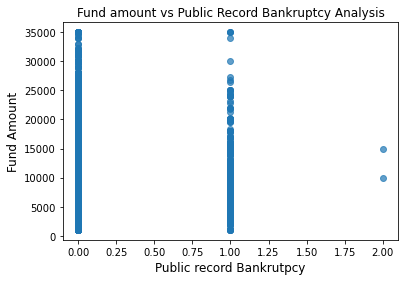

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lending_dataset=pd.read_csv('D:\Python_practice\Lending club\loan.csv')

lending_dataset_cleaned=lending_dataset.dropna(axis = 1, how ='all')

data_charged_off=lending_dataset_cleaned[lending_dataset_cleaned["loan_status"]=="Charged Off"]

#Considering the home_ownership column for Univariate Analysis:
data_charged_off.groupby(['home_ownership']).count()
freq_count=data_charged_off.groupby(['home_ownership']).size().reset_index(name='Count').rename(columns={'home_ownership':'Home_Ownership'})
print("Frequency Count of Home Ownership:\n",freq_count)
print("Bar chart for Univariate Analysis")
#Plotting the bar chart:
plt.bar(freq_count['Home_Ownership'],freq_count['Count'])
plt.title("Home Ownership Analysis\n")
plt.xlabel("Home Type",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Count",fontdict={'fontsize':12,'fontweight':5})
plt.show()
#Observation:The higher number of individuals with Charged Off loans have Home_Ownership as 'MORTGAGE' and 'RENT' so they are likely to default the payment.


#Considering the annual_inc column for Univariate Analysis:
print("\nBox plot for Univariate Analysis:\n")
Annual_income_Charge=np.array(data_charged_off['annual_inc'])
plt.boxplot([Annual_income_Charge])
plt.ylim(3500,900000)
plt.title("Charged Off Customers Income Analysis")
plt.xlabel("Charged Off Customers",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Annual Income",fontdict={'fontsize':12,'fontweight':5})
plt.show()

print("Mean of Annual Income:",np.mean(Annual_income_Charge,axis=0))
print("25th percentile of Annual Income:",np.percentile(Annual_income_Charge,25))
print("Median of Annual Income:",np.percentile(Annual_income_Charge,50))
print("75th percentile of Annual Income:",np.percentile(Annual_income_Charge,75))
print("Standard Deviation of Annual Income:",np.std(Annual_income_Charge,axis=0))

mean_Annual_income=np.mean(Annual_income_Charge,axis=0)
iqr1_Annual_income=np.percentile(Annual_income_Charge,25)
iqr3_Annual_income=np.percentile(Annual_income_Charge,75)
std_Annual_income=np.std(Annual_income_Charge)
#Calculating the inter quartile range:
iqr=iqr3_Annual_income-iqr1_Annual_income
print("IQR: ",iqr)

#Removing the outliers
print("\n Box plot for Univariate Analysis post removal of outliers:\n")
dataset_cleared_iqr = Annual_income_Charge[~((Annual_income_Charge < (iqr1_Annual_income - 1 * iqr)) |(Annual_income_Charge > (iqr3_Annual_income + 1 * iqr)))]
dataset_cleared_iqr
#Mean post removal of outliers is rough appoximate of median value
print("New Mean of Annual Income:",np.mean(dataset_cleared_iqr,axis=0))
print("New Standard Deviation of Annual Income:",np.std(dataset_cleared_iqr,axis=0))

#Box plot post removal of outliers. The low Annual Income of the customers is a cause for the defaulting of loans. 
plt.boxplot([dataset_cleared_iqr])
plt.ylim(3000,150000)
plt.title("Charged Off Customers Income Post Cleansing")
plt.xlabel("Charged Off Customers",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Annual Income",fontdict={'fontsize':12,'fontweight':5})
plt.show()


print("\nUnivariate Analysis:Public Record of Bankruptcy Analysis:\n")
data_charged_off.groupby(['pub_rec_bankruptcies']).count()
freq_count=data_charged_off.groupby(['pub_rec_bankruptcies']).size().reset_index(name='Count').rename(columns={'pub_rec_bankruptcies':'Public_Record_of_Bankruptcy'})
print(freq_count)
plt.figure(figsize=(8, 7))
plots = sns.barplot(freq_count['Public_Record_of_Bankruptcy'],freq_count['Count'])

ticks=np.arange(0,5)
plt.xticks(ticks)


for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Public Record of Bankruptcy Analysis\n",fontdict={'fontsize':15,'fontweight':5})
plt.xlabel("Public Record of Bankruptcy",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Count",fontdict={'fontsize':12,'fontweight':5})
plt.show()
#Observation:Individuals who are listed as bankrupt are less likely to pay the loan

#Bivariate Analysis :Finding the correlation coefficient:
print("\nCorrelation Coefficient: Funded Amount vs Interest Rate\n")
corr_data=data_charged_off[['funded_amnt','int_rate']]
corr_data['int_rate']=corr_data['int_rate'].str.replace('%','').astype(float)
Funded_Amount=np.array(corr_data['funded_amnt'])
Interest_Rate=np.array(corr_data['int_rate'])

corr_cof=np.corrcoef(Interest_Rate,Funded_Amount)
print("Correlation Coefficient Matrix:\n",corr_cof)
corr_data.corr()
#Observation: The Funded Amount and the Interest Rate have a positive correlation, as the Funded Amount increase, 
# the Interest Rate also increases and hence difficulty of repayment of the loan increases.



##Bivariate Analysis: Purpose of Loan vs Deliquency
print("\nBivariate Analysis: Purpose of Loan vs Deliquency\n")

Loan_purpose=np.array(data_charged_off['purpose'])
Delinquency_period=np.array(data_charged_off['delinq_2yrs'])

plt.bar(Loan_purpose,Delinquency_period)
plt.title("Loan Purpose Analysis\n")
plt.xlabel("Loan Purpose",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Delinquency period",fontdict={'fontsize':12,'fontweight':5})
plt.xticks(rotation=90)
plt.show()

#Observation: The loan taken for the purpose of Car and Small business have higher delinquency as when compared to the other types of loans, hence there are more number defaulters for those who have taken Car and Small business loans

#Bivariate Analysis :Fund Amount Delinquency Analysis:
print("\nBivariate Analysis :Fund Amount Delinquency Analysis:\n")

Fund_amount=np.array(data_charged_off['funded_amnt'])

plt.bar(Delinquency_period,Fund_amount)

plt.title("Fund Amount Delinquency Analysis\n")
plt.xlabel("Delinquency period",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Fund_amount",fontdict={'fontsize':12,'fontweight':5})
plt.show()
#Observation: Graph shows the maximum Fund Amounts for which the Deliquency is observed.


#Bivariate Analysis :Fund amount vs Public Record Analysis:
print("\nBivariate Analysis :Fund amount vs Public Record Analysis:\n")
data_charged_off_public=data_charged_off[['funded_amnt','pub_rec']]
Public_record=np.array(data_charged_off_public['pub_rec'])
Fund_amount=np.array(data_charged_off_public['funded_amnt'])

#Creating a scatter plot:
plt.scatter(Public_record,Fund_amount,alpha=0.7)
plt.title("Fund amount vs Public Record Analysis")
plt.xlabel("Public Record",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Fund Amount",fontdict={'fontsize':12,'fontweight':5})
plt.show()
#Observation: Graphs shows that there are many individuals who have been listed on derogatory Public records, those with one or more than 1 public records are likely to default the loan.


#Bivariate Analysis: Fund amount vs Public Record Bankruptcy Analysis:
print("\nBivariate Analysis: Fund amount vs Public Record Bankruptcy Analysis:\n")

data_charged_off_public_bank=data_charged_off[['funded_amnt','pub_rec_bankruptcies']]

Public_record_Bankrupcy=np.array(data_charged_off_public_bank['pub_rec_bankruptcies'])
Fund_amount=np.array(data_charged_off_public_bank['funded_amnt'])

#Creating a scatter plot:
plt.scatter(Public_record_Bankrupcy,Fund_amount,alpha=0.7)
plt.title("Fund amount vs Public Record Bankruptcy Analysis")
plt.xlabel("Public record Bankrutpcy",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Fund Amount",fontdict={'fontsize':12,'fontweight':5})
plt.show()
#Observation: Graphs shows that there are many individuals who have been listed on Public record Bankruptcies, those with one or more than 1 public record bankruptcies are likely to default the loan.
